In [18]:
# We will use RFECV with Random Forest Regressor and 4C4 data set

from sklearn.metrics import mean_squared_error 
import numpy as np
import sys

In [19]:
def rmse_scorer(model, X, y):
    return np.sqrt(mse_scorer(model, X, y))

def mse_scorer(model, X, y):    
    y_predict = model.predict(X)
    if( np.isnan(y_predict).any() ):
        return sys.maxsize
    return mean_squared_error(y, y_predict)

In [20]:
def mse_scorer(model, X, y):
    return mean_squared_error(y, model.predict(X))

In [21]:
with open('4C4_rf_tuned_ABCD.pickle','rb') as handle:
    mo = pickle.load(handle)

In [22]:
mo

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=2000, n_jobs=-1, oob_score=True, random_state=None,
           verbose=0, warm_start=False)

In [23]:
import pickle

with open('datasetIPPD.pickle', 'rb') as handle:
    data = pickle.load(handle)

#extract X_train, y_train, X_test, t_test
X_train  = data['X_train']
y_train = data['y_train']
X_test   = data['X_test']
y_test  = data['y_test']

In [24]:
from sklearn.ensemble.forest import RandomForestRegressor
model = RandomForestRegressor(n_estimators=2000, criterion='mse', 
                                                  max_depth=None, 
                                                  min_samples_split=2, 
                                                  min_samples_leaf=1, 
                                                  min_weight_fraction_leaf=0.0, 
                                                  max_features='auto', 
                                                  max_leaf_nodes=None, 
                                                  min_impurity_split=1e-07, 
                                                  bootstrap=True, oob_score=True, 
                                                  n_jobs=-1, random_state=None, 
                                                  verbose=0, warm_start=False)

In [25]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(model, step=1, cv=3, scoring = mse_scorer) #remove 1 feature at each step
rfecv.fit(X_train, y_train)

RFECV(cv=3,
   estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=2000, n_jobs=-1, oob_score=True, random_state=None,
           verbose=0, warm_start=False),
   n_jobs=1, scoring=<function mse_scorer at 0x7ffa52256400>, step=1,
   verbose=0)

In [35]:
with open('rfecv.pickle', 'wb') as handle:
    pickle.dump(rfecv, handle)

Optimal number of features : 8


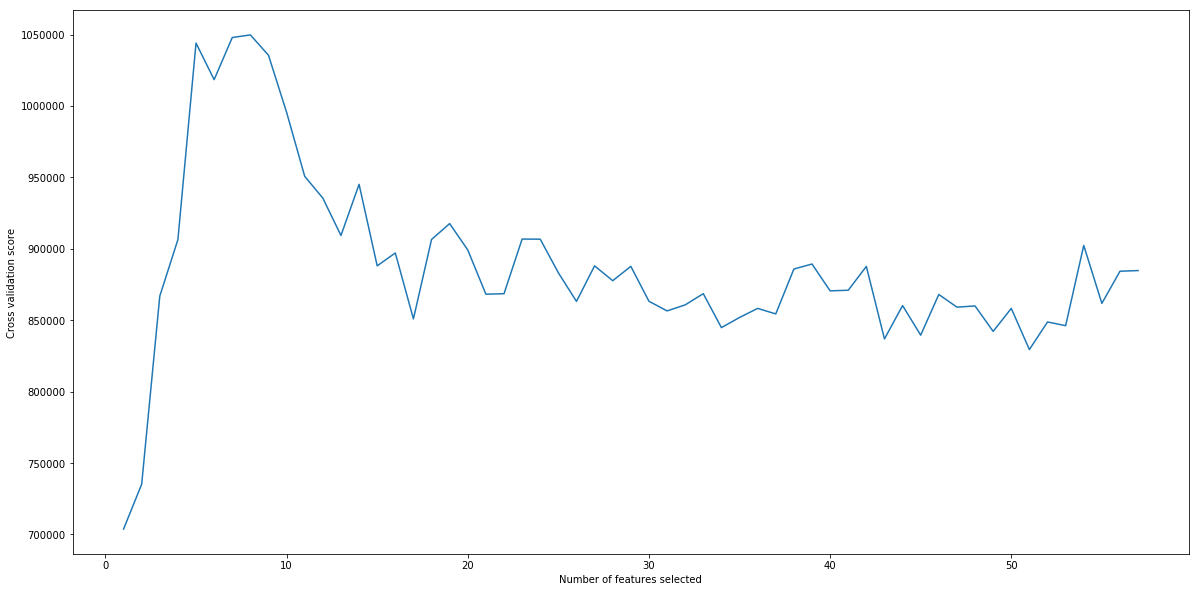

In [30]:
import matplotlib.pyplot as plt

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(20, 10))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [42]:
rfecv.n_features_, len(X_train.columns)

(8, 57)

In [37]:
X_train.columns[rfecv.support_]

Index(['sizeGB', 'ft4', 'ft39', 'ft34', 'ft37', 'ft47', 'ft51', 'ft29'], dtype='object')

In [31]:
if('y_test_A' in data):
    print('A: %d' % len(data['y_test_A']))    
    reporting_testscoreA = rmse_scorer(rfecv, data['X_test_A'], data['y_test_A'])
    test_mean_y_comparingA = data['y_test_A'].mean()
    print('reporting_testscoreA %f' % reporting_testscoreA)
    print('test_mean_y_comparingA %f' % test_mean_y_comparingA)

A: 6
reporting_testscoreA 3.636708
test_mean_y_comparingA 115.430000


In [32]:
if('y_test_B' in data):
    print('B: %d' % len(data['y_test_B']))    
    reporting_testscoreB = rmse_scorer(rfecv, data['X_test_B'], data['y_test_B'])
    test_mean_y_comparingB = data['y_test_B'].mean()
    print('reporting_testscoreB %f' % reporting_testscoreB)
    print('test_mean_y_comparingB %f' % test_mean_y_comparingB)

B: 19
reporting_testscoreB 503.426283
test_mean_y_comparingB 2464.612105


In [33]:
if('y_test_C' in data):
    print('C: %d' % len(data['y_test_C']))    
    reporting_testscoreC = rmse_scorer(rfecv, data['X_test_C'], data['y_test_C'])
    test_mean_y_comparingC = data['y_test_C'].mean()
    print('reporting_testscoreC %f' % reporting_testscoreC)
    print('test_mean_y_comparingC %f' % test_mean_y_comparingC)

C: 19
reporting_testscoreC 112.860553
test_mean_y_comparingC 1608.160526


In [34]:
if('y_test_D' in data):
    print('D: %d' % len(data['y_test_D']))    
    reporting_testscoreD = rmse_scorer(rfecv, data['X_test_D'], data['y_test_D'])
    test_mean_y_comparingD = data['y_test_D'].mean()
    print('reporting_testscoreD %f' % reporting_testscoreD)
    print('test_mean_y_comparingD %f' % test_mean_y_comparingD)

D: 19
reporting_testscoreD 76.677166
test_mean_y_comparingD 1378.651579
